<a href="https://colab.research.google.com/github/camiPadilla/SIS420CP/blob/main/OneVsAll_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

#Usamos la libreria de pandas
import pandas as pd
# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy optimiza la funcion de costo
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat

#Codificamos etiquetas de clase en valor numericos
from sklearn.preprocessing import LabelEncoder

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [3]:
# Ingresar imágenes de dígitos de 28x28
input_layer_size  = 784 #transformamos la imagen en un vector, so la imagen de 28 x 28 se convierte en un vector de 784 unidades

# 10 etiquetas, de 1 a 10 (tomar en cuenta que se asigna "0" a la etiqueta 10)
num_labels = 10 #trabajamos 10 numeros so son 10 valores

# cargamos data y almacenamos este en data
data = pd.read_csv('/content/drive/MyDrive/dataset/fashion-mnist_train.csv')

print(data)

       label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          2       0       0       0       0       0       0       0       0   
1          9       0       0       0       0       0       0       0       0   
2          6       0       0       0       0       0       0       0       5   
3          0       0       0       0       1       2       0       0       0   
4          3       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995      9       0       0       0       0       0       0       0       0   
59996      1       0       0       0       0       0       0       0       0   
59997      8       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      7       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel775  pixel776 

In [4]:
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#Lectura de datos
X, y = data.iloc[:, :-1].values ,data['label'].values.ravel() # Todas las filas, todas las columnas excepto la última
 # Los valores de la columna 'y' como arreglo unidimensional
y[y == 10] = 0 #valores de y que son 10,los vuelva 0

m = y.size

In [37]:
# Imprimimos los valores de X y y
print(X)
print('-'*15)
print(y)

[[2 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 ...
 [8 0 0 ... 0 0 0]
 [8 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]]
---------------
[2 9 6 ... 8 8 7]


In [23]:
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Muestra datos 2D almacenados en X en una cuadrícula apropiada.
    """
    X = np.array(X)  # Convertir a arreglo de numpy

    # Calcula filas, columnas
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promocionar a una matriz bidimensional
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimensional.')

    example_width = example_width or int(np.sqrt(n))
    example_height = n / example_width

    # Calcula el numero de elementos a mostrar
    display_rows = int(np.sqrt(m))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='C'), cmap='Greys', extent=[0, 1, 0, 1], aspect='equal', origin='upper')
        ax.axis('off')

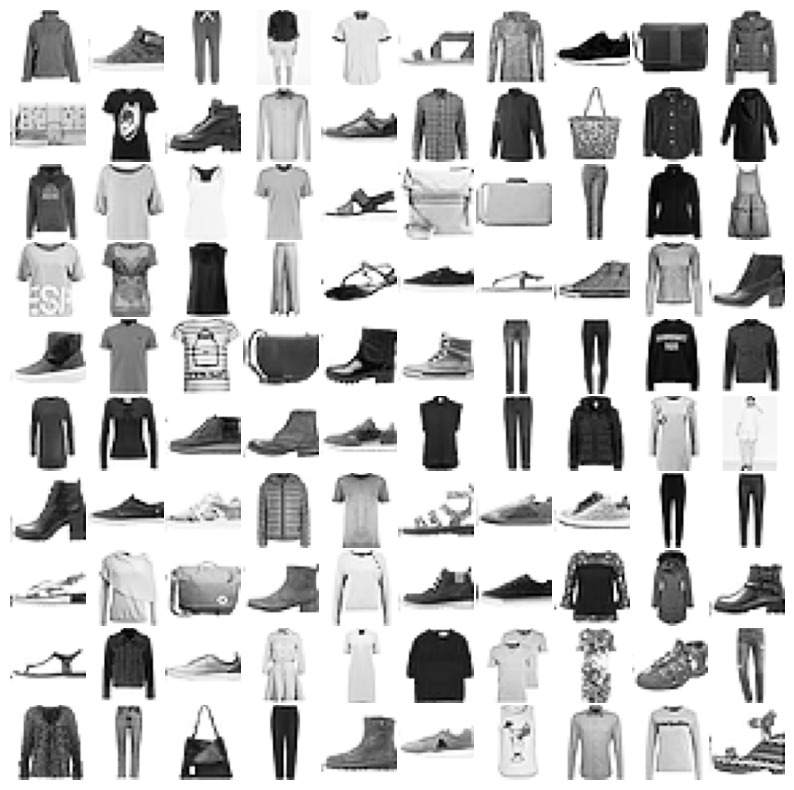

In [24]:
# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

displayData(sel)

In [25]:
# valores de prueba para los parámetros theta
theta_t = np.array([-2, -1, 1, 2], dtype=float)

# valores de prueba para las entradas
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)

# valores de testeo para las etiquetas
y_t = np.array([1, 0, 1, 0, 1])

# valores de testeo para el parametro de regularizacion
lambda_t = 3

In [26]:
def sigmoid(z):
    """
    Calcula la sigmoide de z.
    """
    return 1.0 / (1.0 + np.exp(-z))

In [27]:
def lrCostFunction(theta, X, y, lambda_):

    # Inicializa algunos valores utiles
    m = y.size #numero de ejemplos del tamaño de y

    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))
    #h supuesto valor de y

    temp = theta
    temp[0] = 0

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad

In [28]:
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('Costo         : {:.6f}'.format(J))
print('Costo esperadot: 2.534819')
print('-----------------------')
print('Gradientes:')
print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad))
print('Gradientes esperados:')
print(' [0.146561, -0.548558, 0.724722, 1.398003]');

Costo         : 2.534819
Costo esperadot: 2.534819
-----------------------
Gradientes:
 [0.146561, -0.548558, 0.724722, 1.398003]
Gradientes esperados:
 [0.146561, -0.548558, 0.724722, 1.398003]


In [29]:
def oneVsAll(X, y, num_labels, lambda_):

    # algunas variables utiles
    m, n = X.shape #m numero de jemplos y n numero de x

    # print(m, n)
    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50} # le decimos cuantas intercciones haremos  1:13 audio
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)
        # print(res)
        all_theta[c] = res.x

    return all_theta

In [30]:
lambda_ = 0.0001
all_theta = oneVsAll(X, y, num_labels, lambda_)

<ipython-input-26-575a438e2fc3>:5: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))
<ipython-input-27-c1494092ee83>:47: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
<ipython-input-26-575a438e2fc3>:5: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))
<ipython-input-27-c1494092ee83>:47: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
<ipython-input-26-575a438e2fc3>:5: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))
<ipython-input-27-c1494092ee83>:47: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))


In [31]:
print(all_theta.shape)
print(all_theta[0])

(10, 785)
[-6.29732336e-05 -1.97893851e-03 -1.30586874e-06  1.33759699e-06
  1.53008570e-05  4.77424488e-05 -2.32671598e-05 -5.00259781e-05
 -2.34251534e-04 -5.88228760e-04 -5.66110118e-04 -7.08903806e-04
 -1.06168554e-03  8.99387789e-04 -5.04386754e-04 -1.90695718e-03
 -1.83882055e-03 -1.79755573e-03  1.02630616e-03  5.77219555e-04
 -4.42211149e-04  6.22224310e-05  2.97448079e-04 -1.53879046e-04
 -1.77188624e-04 -1.37730397e-04  1.74856777e-05  5.32630842e-05
 -9.65204702e-06 -3.88351316e-07  9.98107424e-07  1.58542954e-06
  5.10510467e-05  1.52942015e-04  2.09276660e-05 -7.64555962e-04
 -1.66124721e-03 -9.38283564e-04 -4.44927275e-04 -1.10532925e-03
 -4.53222510e-04  5.13524037e-04 -6.38243808e-04 -5.17265624e-04
 -1.71034150e-04 -1.76703224e-04  5.68995658e-04  1.14644088e-03
  2.93892063e-04  3.85012041e-04  1.38918659e-03  4.46763103e-04
  2.23221813e-04 -6.83262326e-05 -2.87062576e-05  1.29554569e-04
  3.28601058e-06  1.89370740e-05  3.90791420e-07 -3.02138783e-05
 -4.52014550e-0

In [32]:
def predictOneVsAll(all_theta, X):
    """
    Devuelve un vector de predicciones para cada ejemplo en la matriz X.
    Tenga en cuenta que X contiene los ejemplos en filas.
    all_theta es una matriz donde la i-ésima fila es un vector theta de regresión logística entrenada para la i-ésima clase.
    Debe establecer p en un vector de valores de 0..K-1 (por ejemplo, p = [0, 2, 0, 1]
    predice clases 0, 2, 0, 1 para 4 ejemplos).

    Parametros
    ----------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        and n is number of features without the bias.

    X : array_like
        Data points to predict their labels. This is a matrix of shape
        (m x n) where m is number of data points to predict, and n is number
        of features without the bias term. Note we add the bias term for X in
        this function.

    Devuelve
    -------
    p : array_like
        The predictions for each data point in X. This is a vector of shape (m, ).
    """

    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis=1)

    return p

(60000, 784)
Precision del conjuto de entrenamiento: 85.64%
(100, 784)
(100, 785)
[9 2 9 5 8 8 5 4 4 9 1 0 0 0 9 0 7 4 5 0 4 0 1 0 7 9 2 7 3 4 0 7 9 0 2 2 9
 4 1 9 2 4 3 0 1 1 4 8 5 7 8 0 7 7 7 3 2 7 7 7 7 9 2 9 2 1 6 8 5 1 9 0 4 8
 3 3 5 9 3 3 8 0 3 1 3 8 3 0 2 0 0 3 8 1 1 1 8 9 0 5] [9 2 9 5 8 8 5 1 4 9 1 0 0 0 9 6 7 4 5 0 4 0 1 0 7 9 6 5 3 4 0 7 9 0 2 2 9
 4 1 9 2 6 3 0 1 1 6 8 5 7 8 0 7 7 7 3 2 7 7 7 7 9 2 9 2 1 0 8 5 1 9 0 4 8
 3 3 5 9 3 3 8 0 3 1 3 8 3 0 2 0 6 3 8 1 1 1 8 9 0 9]


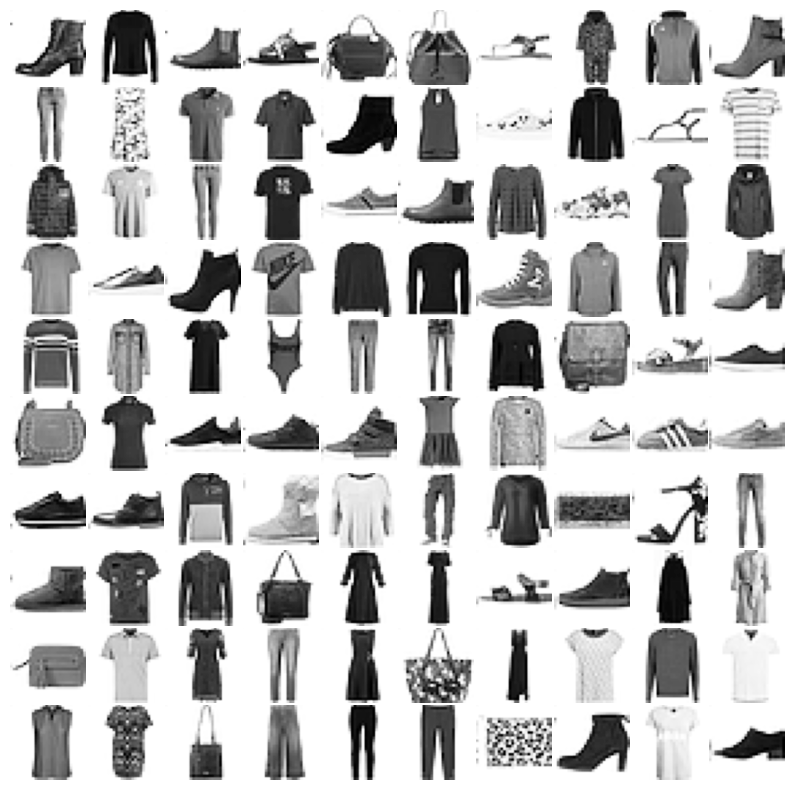

In [33]:
print(X.shape)
pred = predictOneVsAll(all_theta, X) # x son todas la imagenes
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))
# XPrueba = X[4490:4590, :].copy()

# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.random.choice(m, 100, replace=False)
XPrueba = X[rand_indices, :]
XPruebaV = XPrueba.copy()


print(XPrueba.shape)
#print(np.ones((1)))
#print(XPrueba)
#p = np.zeros(1)
XPrueba = np.concatenate([np.ones((100, 1)), XPrueba], axis=1)
print(XPrueba.shape)
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print(p, y[rand_indices])

displayData(XPruebaV)
'''
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot
'''